In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [ ]:
creditCardData = pd.read_csv('../input/creditcard.csv')
creditCardData.head()

In [71]:
print(creditCardData[creditCardData['Class'] == 0].shape)
print(creditCardData[creditCardData['Class'] != 0].shape[0] / creditCardData.shape[0])

(284315, 35)
0.001727485630620034


In [ ]:
creditCardData.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
correlationData = creditCardData.corr()

In [ ]:
plt.figure?

In [ ]:
plt.figure(figsize=(30,12))
sbn.heatmap(correlationData, cmap='rainbow', annot= True)
plt.show()

In [ ]:
creditCardData['V3V7'] = creditCardData['V3']*creditCardData['V7']

In [ ]:
creditCardData['V10V12'] = creditCardData['V10']*creditCardData['V12']
creditCardData['V14V17'] = creditCardData['V14']*creditCardData['V17']
creditCardData['V16V17'] = creditCardData['V16']*creditCardData['V17']

In [ ]:
correlationData = creditCardData.corr()
plt.figure(figsize=(30,12))
sbn.heatmap(correlationData, cmap='rainbow', annot= True)
plt.show()

In [ ]:
trainX = creditCardData[['V3', 'V7', 'V10', 'V12', 'V14', 'V17', 'V16']]

In [ ]:
trainX

In [ ]:
Polyn

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias=False)
creditCardPoly = poly_features.fit_transform(trainX)
creditCardPoly

array([[ 2.53634674e+00,  2.39598554e-01,  9.07941720e-02, ...,
        -2.03457811e-02,  4.60191806e-02, -1.04088654e-01],
       [ 1.66480113e-01, -7.88029833e-02, -1.66974414e-01, ...,
         6.11447794e-03, -2.47081472e-02,  9.98437714e-02],
       [ 1.77320934e+00,  7.91460956e-01,  2.07642865e-01, ...,
        -3.56067504e+00,  9.27110900e+00, -2.41396536e+01],
       ...,
       [-3.24963981e+00, -2.96826527e-01, -4.84781756e-01, ...,
         1.38300410e-02,  6.20764497e-03,  2.78631539e-03],
       [ 7.02510230e-01, -6.86179986e-01, -3.99125651e-01, ...,
        -1.58246506e-01,  1.88860225e-01, -2.25396349e-01],
       [ 7.03337367e-01,  1.57700625e+00, -9.15426649e-01, ...,
        -1.31971807e-01, -6.04765778e-02, -2.77136197e-02]])

In [82]:
print(creditCardPoly.shape[1] + 1)

120


In [84]:
creditCardPolyDf = pd.DataFrame({'Column'+ str(i): creditCardPoly[:,i-1] for i in range(1,(creditCardPoly.shape[0]))})
creditCardPolyDf

IndexError: index 119 is out of bounds for axis 1 with size 119

In [75]:
creditCardPolyDf['Class'] = creditCardData['Class']

In [76]:
creditCardPolyDf

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Class
0,2.536347,0.239599,0.090794,-0.617801,-0.311169,0.207971,-0.470401,6.433055,0.607705,0.230286,...,0.192241,-0.128485,0.290614,9.682637e-02,-0.064714,1.463742e-01,0.043252,-0.097830,2.212767e-01,0
1,0.166480,-0.078803,-0.166974,1.065235,-0.143772,-0.114805,0.463917,0.027716,-0.013119,-0.027798,...,-0.153151,-0.122294,0.494181,2.067047e-02,0.016506,-6.669842e-02,0.013180,-0.053260,2.152190e-01,0
2,1.773209,0.791461,0.207643,0.066084,-0.165946,1.109969,-2.890083,3.144271,1.403426,0.368194,...,-0.010966,0.073351,-0.190987,2.753805e-02,-0.184195,4.795975e-01,1.232032,-3.207904,8.352581e+00,0
3,1.792993,0.237609,-0.054952,0.178228,-0.287924,-0.684093,-1.059647,3.214825,0.426031,-0.098528,...,-0.051316,-0.121925,-0.188859,8.290008e-02,0.196967,3.050976e-01,0.467983,0.724897,1.122852e+00,0
4,1.548718,0.592941,0.753074,0.538196,-1.119670,-0.237033,-0.451449,2.398527,0.918298,1.166300,...,-0.602601,-0.127570,-0.242968,1.253661e+00,0.265399,5.054740e-01,0.056185,0.107008,2.038064e-01,0
5,1.141109,0.476201,-0.371407,0.359894,-0.137134,-0.058133,0.401726,1.302131,0.543397,-0.423816,...,-0.049354,-0.020922,0.144579,1.880565e-02,0.007972,-5.509016e-02,0.003379,-0.023353,1.613837e-01,0
6,0.045371,-0.005159,-0.099254,-0.153826,0.167372,0.002821,-0.443587,0.002059,-0.000234,-0.004503,...,-0.025746,-0.000434,0.068235,2.801337e-02,0.000472,-7.424399e-02,0.000008,-0.001251,1.967692e-01,0
7,1.074380,1.120631,1.249376,0.291474,-1.323865,-1.222127,-0.076127,1.154293,1.203984,1.342305,...,-0.385873,-0.356219,-0.022189,1.752619e+00,1.617932,1.007819e-01,1.493595,0.093037,5.795320e-03,0
8,-0.113192,0.370145,-0.410430,-0.110452,0.074355,-0.499768,-0.210077,0.012812,-0.041898,0.046458,...,-0.008213,0.055201,0.023204,5.528720e-03,-0.037160,-1.562037e-02,0.249768,0.104990,4.413246e-02,0
9,1.044367,0.651583,-0.366846,0.836390,-0.443523,-0.540980,0.739453,1.090701,0.680492,-0.383121,...,-0.370958,-0.452470,0.618471,1.967125e-01,0.239937,-3.279642e-01,0.292659,-0.400029,5.467904e-01,0


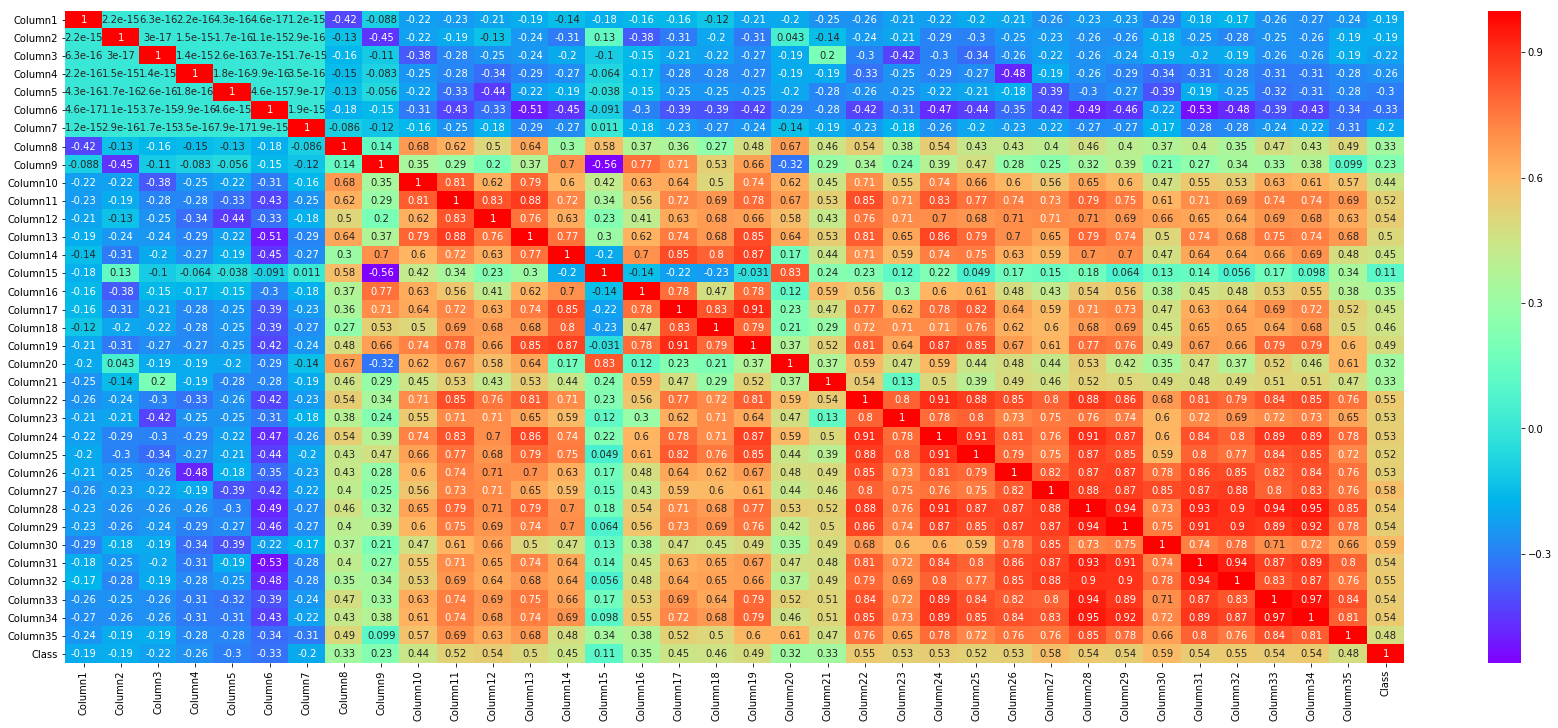

In [77]:
creditCardPolyCorrelationData = creditCardPolyDf.corr()
plt.figure(figsize=(30,12))
sbn.heatmap(creditCardPolyCorrelationData, cmap='rainbow', annot= True)
plt.show()

In [ ]:
selectedFeatures = ['',]